## three level 할거임
- Quantum optics보고 해보자
### 5.7 Spectrum of resonance Fluorescence
- monochromatic field에 의해 single atom으로 인한 radiation (resonance fluorescence)를 고려해보자
- Optical Wiener-Khinchin theorem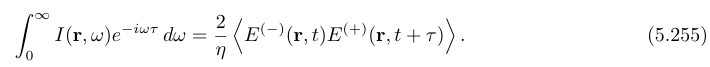
- scattered spectrum 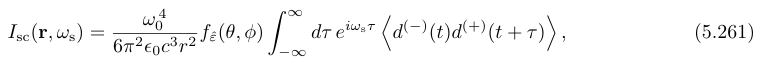
- radiation spectrum, intensity spectral density 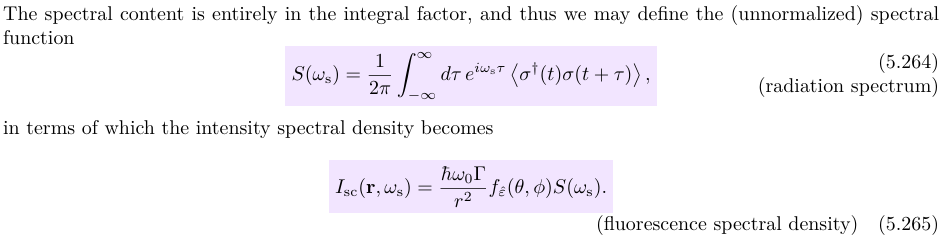
- rotating frame에서 spectral function 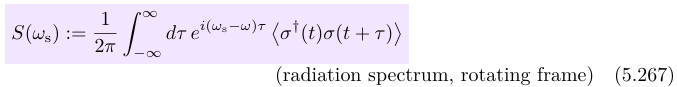

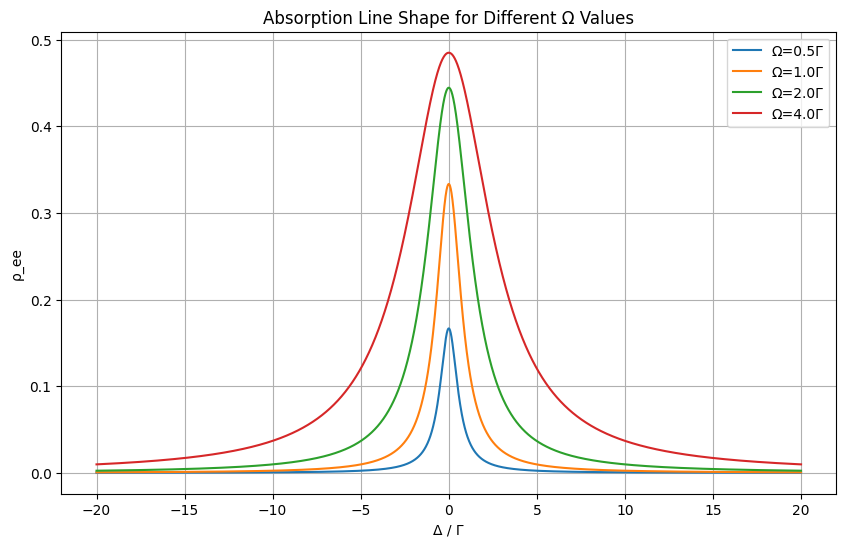

In [5]:
# 이 그래프는 two-level population rho_ee에 대한 식

import numpy as np
import matplotlib.pyplot as plt

# 상수값 설정
Gamma = 1  # 단위 비율 (1/s)
Omega_vals = np.array([0.5, 1.0, 2, 4]) * Gamma  # Rabi 주파수의 다양한 값

# rho_ee 계산
def rho_ee(Omega, Delta, Gamma):
    numerator = Omega**2 / Gamma**2
    denominator = 1 + (2 * Delta / Gamma)**2 + 2 * Omega**2 / Gamma**2
    return numerator / denominator

# Delta 값의 범위 설정
Delta_vals = np.linspace(-20 * Gamma, 20 * Gamma, 3000)

# 그래프 그리기
plt.figure(figsize=(10, 6))

for Omega in Omega_vals:
    rho_ee_vals = rho_ee(Omega, Delta_vals, Gamma)
    plt.plot(Delta_vals / Gamma, rho_ee_vals, label=f'Ω={Omega / Gamma:.1f}Γ')

plt.xlabel('Δ / Γ')
plt.ylabel('ρ_ee')
plt.title('Absorption Line Shape for Different Ω Values')
plt.legend()
plt.grid(True)
plt.show()

#이때 여기에서 weak driving field, strong-field limit인 조건에 따라 rho_ee가 다름 


# 5.7.4 Mollow Triplet
- Mollow가 계산한 Mollow spectrum
- OBE 식을 써서 하고 transverse Bloch-vector component 대신에 complex coherence를 유지
- spectrum의 incoherent part를 계산할 필요가 있어서 atomic operator의 fluctutation part를 treat해야함 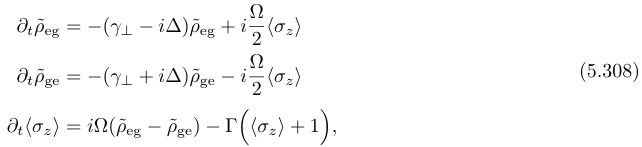
- 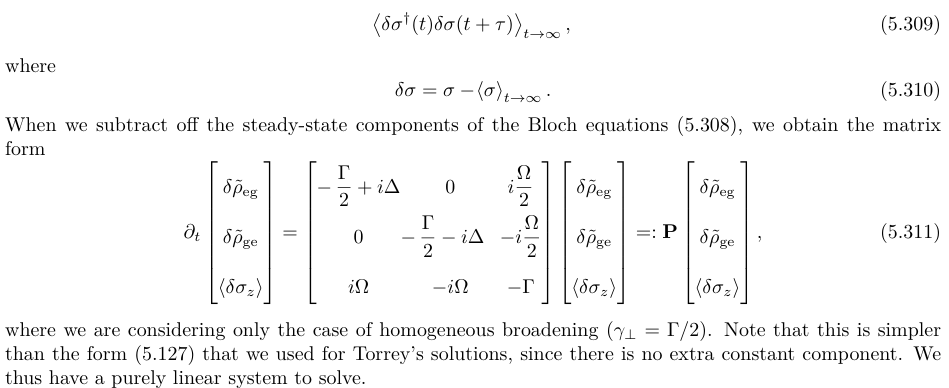
- quantum regression theorem을 써서 추가적으로 계산함
- 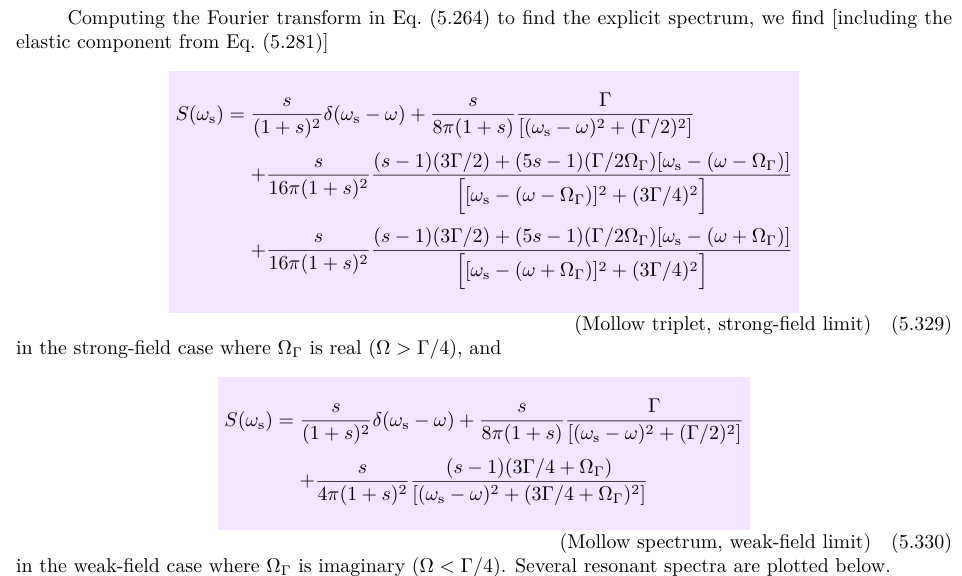

## 5.7.6 Probe Absorption
- effect of a driven, two-level atom on a second, weak probe field의 경우를 볼거임
- probe-absorption spectrum for the auxiliary probe field에 대한 것을 고려할거임
- Mollow's argument를 따르면 probe field와의 coupling으로 인해 atomic density operator에 대한 lowest-order perturbation을 계산할 것임
- $H_p(t)$는 atom-probe coupling Hamiltonian
- interaction picture에서의 time-dependent perturbation theory, state의 perturbation은 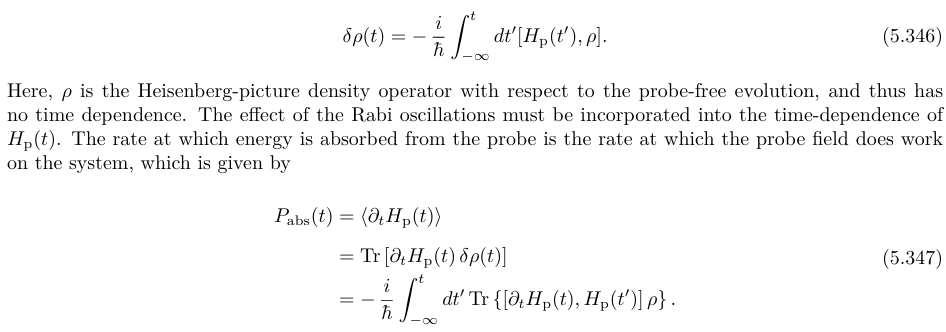
- 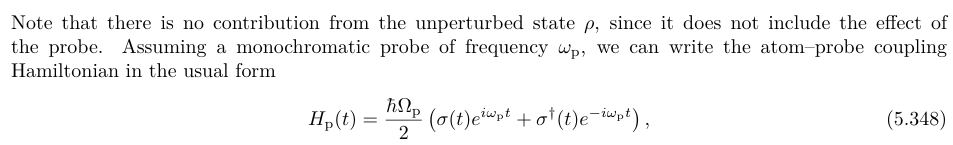
- 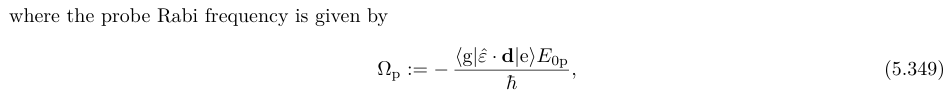
- 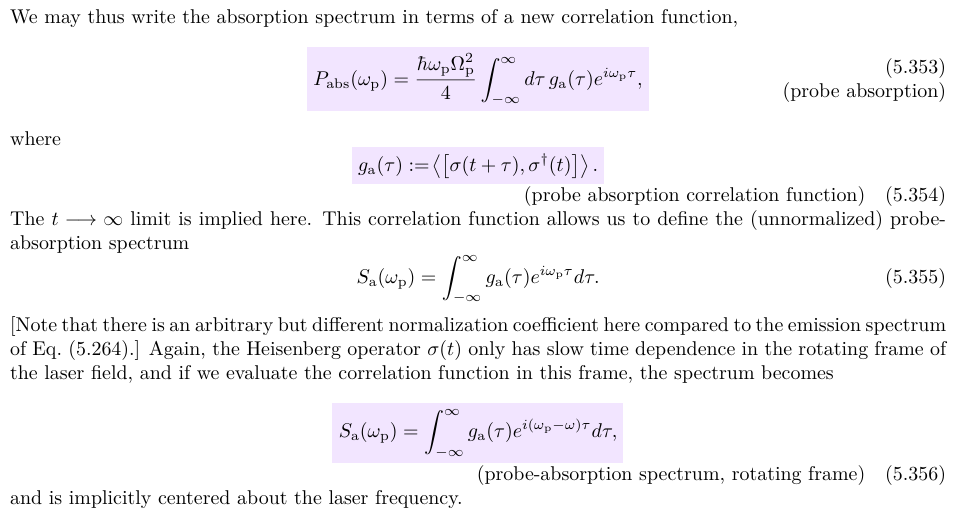
- 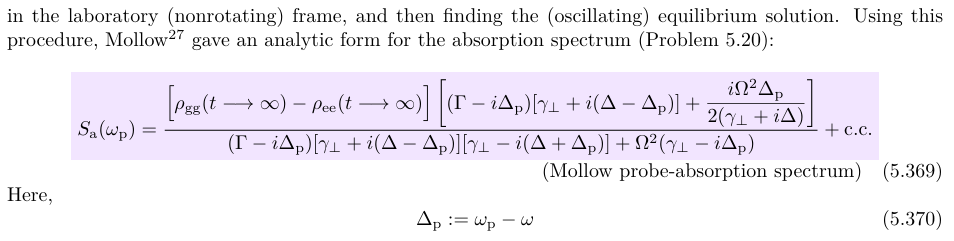
- 

In [9]:
import scipy

# Fourier Transforms (scipy.fft)
- Fourier analysis는 periodic component의 합으로서의 함수를 표현하는 방법, component로부터의 signal을 recover하는 방법을 말함
- discrete Fourier transform (DFT)를 더 빠르게 한 것이 Fast Fourier transform (FFT)
### 1. 1-D discrete Fourier transforms
- time-domain의 데이터를 frequency-domain으로 변환하는 기술
- length N의 sequence(수열) x[n]의 length N의 FFT y[k]는 $y[k] = \sum^{N-1}_{n=0} e^{-2 \pi j kn/N} x[n]$
- inverse transform은 $x[n] = \frac{1}{N} \sum^{N-1}_{n=0} e^{-2 \pi j kn/N} y[k]$
- x[n]은 time-domain의 샘플 값, y[k]은 frequency-domain에서의 결과, N은 샘플의 총 수, n은 현재 샘플의 인덱스, k는 결과 주파수 component의 인덱스
- exponential function의 역할이 각 샘플 값 x[n]이 회전하는 정도와 방향을 나타냄. 이 함수가 주파수 성분을 추출하는 역할

In [5]:
# x가 실수값인 경우, 양의 주파수에서의 y[n]값은 음의 주파수에서의 y[n]의 conjugate임, spectrum이 symmetric하기 때문에
from scipy.fft import fft, ifft
import numpy as np
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y
yinv = ifft(y)
yinv
# N이 짝수일 때, y[1] ... y[N/2 - 1]은 positive-frequency terms, y[N/2]...y[N-1]는 negative-frequency term을 포함
# N이 홀수일 때, y[1] ... y[(N-1)/2]은 positive-frequency terns, y[(N+1)/2]...y[N-1]은 negative-frequency term

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

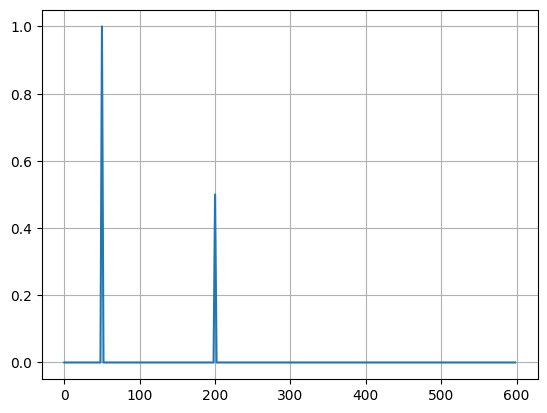

In [9]:
# 두 sine의 합의 FFT
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 1200.0 # 초당 800개의 샘플, sampling frequency 800 Hz
x = np.linspace(0.0, N*T, N, endpoint=False) # 0부터 N*T까지 N의 간격으로 샘플을 잡음, 끝 값인 N*T는 포함x
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(200.0 * 2.0*np.pi*x) # 두 sine signal(50 Hz, 200 Hz)
yf = fft(y) # 시간 도메인 신호 y에 대해 FFT를 수행하고 yf에 저장
xf = fftfreq(N, T)[:N//2] # 각 FFT 샘플의 주파수를 계산하고, ':N//2'를 사용하여 주파수 배열의 절반만 가져옴(양의 주파수만)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2])) # 계산된 주파수 xf, FFT 결과의 절대값을 그래프로 표시, 각 값은 2/N으로 정규화되어 진폭을 나타냄
plt.grid()
plt.show()
# 50 Hz의 성분의 진폭은 1이 되어야 하는데 ~0.6이다. 왜 그럴까? 샘플의 수가 적기 때문에
# 이렇게 잘린 신호는 infinite signal과 rectangular window function의 곱으로 모델링할 수 있음
# 스펙트럼 영역에서 이 곱셈은 신호 스펙트럼과 window 함수 스펙스럼의 convolution이 되어 sin(x)/x의 형태가 됨
# rectangular window function은 신호의 특정 부분만을 선택하고 나머지 부분은 0으로 설정하는 함수
# 신호의 관심 구간을 1로 유지하면서 나머지는 0으로 마스킹하여 신호를 잘라내는 효과를 냄
# FFT를 할 때 무한한 시간 도메인의 신호라면 깨끗한 신호가 나오지만, 실제 신호를 유한한 길이로 잘라내어 분석하면, 원래의 무한 신호에 사각 윈도우 함수를 곱한 것으로 볼 수 있음
# 이때 발생하는 효과가 spectral leakage, 신호가 갑자기 끊기게 되면, 이는 주파수 도메인에서 다양한 주파수 성분이 뒤섞이는 결과를 초래

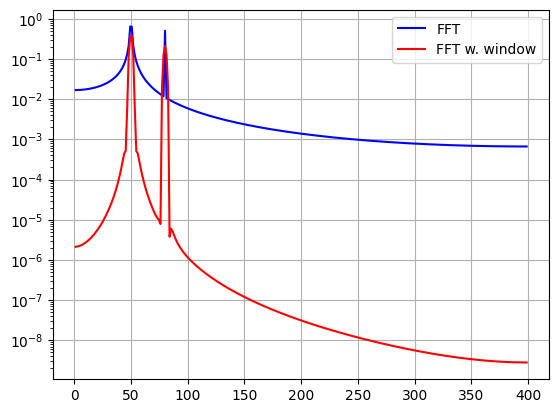

In [15]:
# window function은 신호 처리에서 신호의 특정 부분을 선택하거나 강조하는 데 사용되는 수학적 함수
# 이 예시는 Blackman window를 사용한 FFT
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
from scipy.signal.windows import blackman
w = blackman(N)
ywf = fft(y*w) # 유한한 신호에 윈도우를 곱함
xf = fftfreq(N, T)[:N//2] # 주파수 배열 생성
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b') # semilogy는 로그 스케일로 Y축 값을 표시하는 그래프 함ㅅ
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show
# blackman window를 사용한 FFT로 spectral leakage를 감소하는 것을 확인함

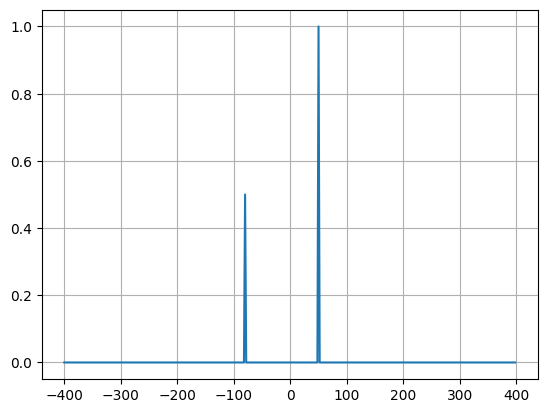

In [16]:
# 수열 x가 complex-valued라면 spectrum의 symmetry는 깨짐
from scipy.fft import fft, fftfreq, fftshift
import numpy as np
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show
# rfft 함수는 실수 수열의 FFT를 계산하고 주파수 범위의 반만큼만의 complex FFT coefficient y[n]을 output함

# Signal Processing (scipy.signal)
1. filtering functions
2. limited set of filter design tools
3. few B-spline interpolation algorithms for 1- and 2-D data
## Spectral Analysis
- Spectral analysis는 signal의 Fourier transform을 조사하는 것을 말함
- 고정된 주기를 가진 continuous-time sine wave signal을 예로 볼거임
- discrete Fourier transform을 사용 [periodogram, welch, lombscargle]

### Continuous-time Sine Signal
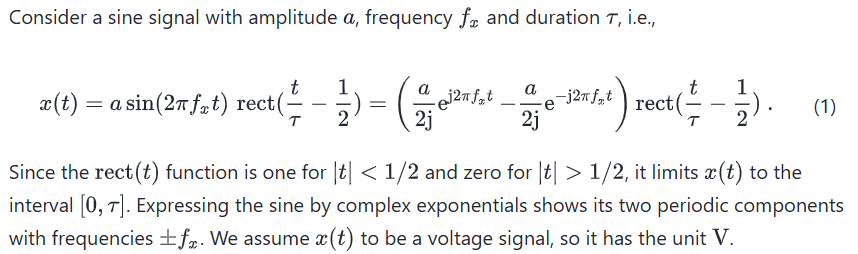

- x(t)를 Fourier transform하면 $X(f) = \int_{R} x(t) e^{-2j \pi f t}dt = (a \tau / 2j)(sinc(\tau(f-f_{x}))-sinc(\tau(f+f_{x}))) e^{-j \pi \tau f}$
- 두 $sinc(f):=sin(\pi f) / (\pi f)$는 +-f_{x}에 centered
- |X(f)|는 +-f_{x}에 maxima를 가짐. $|a| \tau /2$
- X(f)는 main lobes +-f_x 주위에 concentrated 하지 않음, but side lobes는 $1/(\tau f)$에 비례하게 height가 감소됨
- 이것을 "spectral leakage"라고 함. finite interval에 sine을 confining해서 생기는 일
- signal duration $\tau$가 짧을수록, leakage가 높아진다
- signal duration의 independent되면 "amplitude spectrum"이라 부르고 $X(f)$ 대신에 $X(f)/\tau$라 쓸 수 있음
- Parseval's theorem에 의해 에너지는 Fourier transform X(f)로부터 계산될 수 있음
- $E_X := \int_{R} |X(f)|^{2} df = E_{x}$
- X(f)의 에너지는 $|a|^2 \tau / 2$
- 따라서 frequency band $[f_a, f_b]$ 에서 signal's power는 $P^{a,b}_{X} = \frac{1}{\tau} \int^{f_b}_{f_a} |X(f)|^2 df$
- Thus $|X(f)|^2$는 "energy spectral density"라 정의, $S_{xx}(f):=|X(f)|^2/\tau$는 "power spectral density"(PSD) of x(t)라 정의함
- PSD 대신 "amplitude spectral density" $X(f)/sqrt(\tau)$도 사용함, 여기에는 phase information도 있음
- 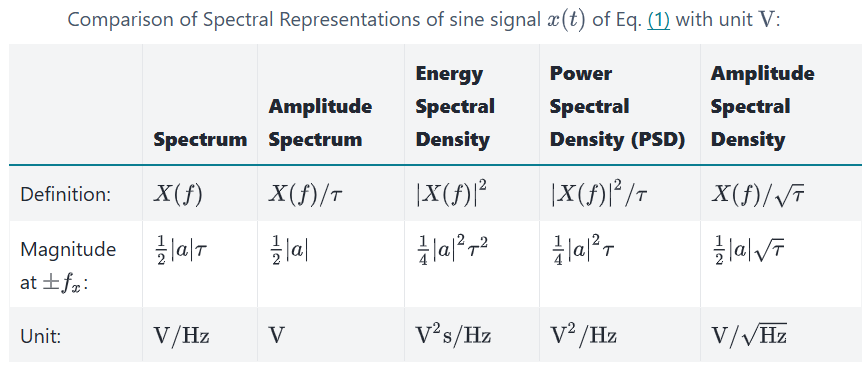
- 

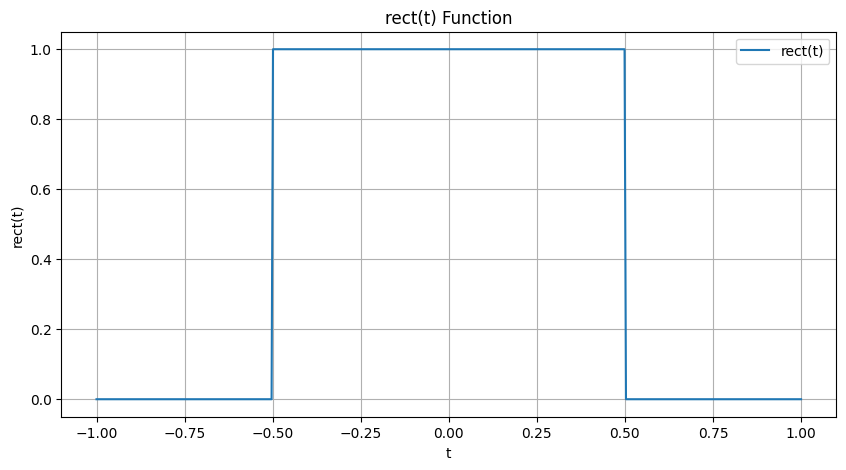

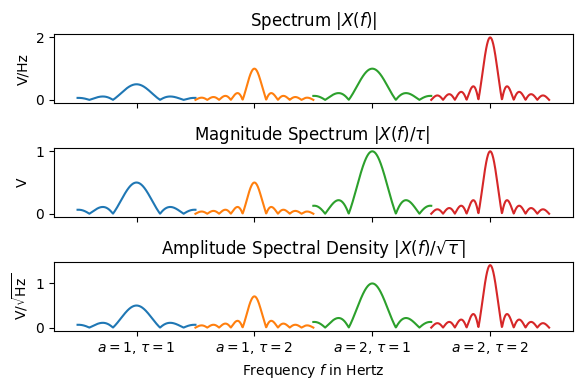

In [12]:
# 이 plot는 다른 amplitude a와 주기 \tau를 가진 sine signal x(t)의 다른 spectral representation을 보여줌

import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import matplotlib.pyplot as plt

# Define the rect(t) function
def rect(t):
    return np.where(np.abs(t) < 0.5, 1, 0)

# Generate a range of t values
t_values = np.linspace(-1, 1, 500)

# Apply the rect(t) function
rect_values = rect(t_values)

# Plot the rect(t) function
plt.figure(figsize=(10, 5))
plt.plot(t_values, rect_values, label='rect(t)')
plt.xlabel('t')
plt.ylabel('rect(t)')
plt.title('rect(t) Function')
plt.grid(True)
plt.legend()
plt.show()
# rect(t) function으로 인해 x(t)는 interval [0, tau]로 limit



aa = [1, 1, 2, 2]  # amplitudes
taus = [1, 2, 1, 2]  # durations

fg0, axx = plt.subplots(3, 1, sharex='all', tight_layout=True, figsize=(6., 4.))
axx[0].set(title=r"Spectrum $|X(f)|$", ylabel="V/Hz")
axx[1].set(title=r"Magnitude Spectrum $|X(f)/\tau|$ ", ylabel=r"V")
axx[2].set(title=r"Amplitude Spectral Density $|X(f)/\sqrt{\tau}|$",
           ylabel=r"$\operatorname{V} / \sqrt{\operatorname{Hz}}$",
           xlabel="Frequency $f$ in Hertz",)

x_labels, x_ticks = [], []
f = np.linspace(-2.5, 2.5, 400)
for c_, (a_, tau_) in enumerate(zip(aa, taus), start=1):
    aZ_, f_ = abs(a_ * tau_ * np.sinc(tau_ * f) / 2), f + c_ * 5
    axx[0].plot(f_, aZ_)
    axx[1].plot(f_, aZ_ / tau_)
    axx[2].plot(f_, aZ_ / np.sqrt(tau_))
    x_labels.append(rf"$a={a_:g}$, $\tau={tau_:g}$")
    x_ticks.append(c_ * 5)

axx[2].set_xticks(x_ticks)
axx[2].set_xticklabels(x_labels)
plt.show()

# 결과를 보면 height of the peak가 다른 것을 알 수 있음

## Sampled Sine Signal
- n samples $x_k:=x(kT), k=0, ..., n-1$, T는 sampling interval
- $\tau := nT$ : the signal's duration, $f_S:=1/T$ : the sampling frequency
- continuous signal은 aliasing을 피하기 위해 band-limited [-f_S/2, f_S/2]를 필요로 함, f_S/2는 Nyquist frequency
- 이러한 경우에는 integral이 아닌 sum으로 표현을 하고 discrete Fourier transform (DFT)로 하게 됨

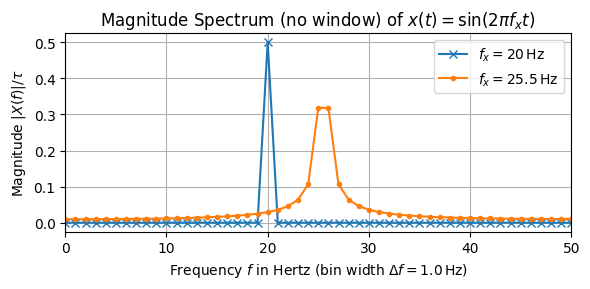

In [14]:
# 이 그림은 20, 20.5 Hz의 주파수, unit amplitude를 가진 두 sine signal의 magnitude spectrum을 보여줌
# 이 signal은 n = 100 samples, sampling interval of T = 10 ms, duration of \tau = 1과 sampling freuqency of f_S = 100 Hz를 초래함

import matplotlib.pyplot as plt
import numpy as np

from scipy.fft import rfft, rfftfreq

n, T = 100, 0.01  # number of samples and sampling interval, 0.01 간격으로 샘플링함
fcc = (20, 25.5)  # frequencies of sines
t = np.arange(n) * T
xx = (np.sin(2 * np.pi * fx_ * t) for fx_ in fcc)  # sine signals

f = rfftfreq(n, T)  # frequency bins range from 0 Hz to Nyquist freq. 
XX = (rfft(x_) / n for x_ in xx)  # one-sided magnitude spectrum, 각 신호에 대해 rFFT하고 결과를 샘플 수로 나누어 정규화

fg1, ax1 = plt.subplots(1, 1, tight_layout=True, figsize=(6., 3.))
ax1.set(title=r"Magnitude Spectrum (no window) of $x(t) = \sin(2\pi f_x t)$ ",
        xlabel=rf"Frequency $f$ in Hertz (bin width $\Delta f = {f[1]}\,$Hz)",
        ylabel=r"Magnitude $|X(f)|/\tau$", xlim=(f[0], f[-1]))
for X_, fc_, m_ in zip(XX, fcc, ('x-', '.-')):
    ax1.plot(f, abs(X_), m_, label=rf"$f_x={fc_}\,$Hz")

ax1.grid(True)
ax1.legend()
plt.show()

# 20 Hz에서를 제외하고는 모든 값은 0, 20.5 Hz signal의 peak는 1 Hz의 bin width의 배수가 아니기 때문에 peak가 뭉개짐

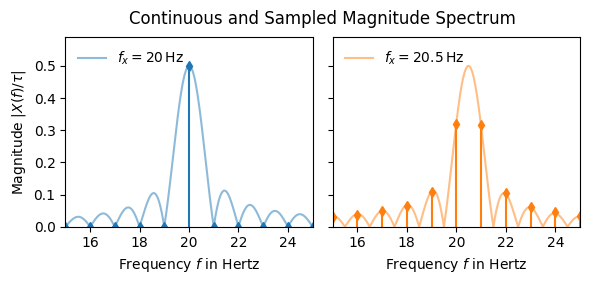

In [28]:
# 이 그림은 샘플링된 스펙트럼 위에 continuous spectrum을 overlay하여 보여줌
import matplotlib.pyplot as plt
import numpy as np

from scipy.fft import rfft, rfftfreq

n, T = 100, 0.01  # number of samples and sampling interval
tau = n*T
t = np.arange(n) * T
fcc = (20, 20.5)  # frequencies of sines
xx = (np.sin(2 * np.pi * fc_ * t) for fc_ in fcc)  # sine signals

f = rfftfreq(n, T)  # frequency bins range from 0 Hz to Nyquist freq.
XX = (rfft(x_) / n for x_ in xx)  # one-sided FFT normalized to magnitude

i0, i1 = 15, 25 # 관심 주파수 범위 지정
f_cont = np.linspace(f[i0], f[i1], 501) # 연속 주파수 범위 생성

fg1, axx = plt.subplots(1, 2, sharey='all', tight_layout=True,
                        figsize=(6., 3.))
for c_, (ax_, X_, fx_) in enumerate(zip(axx, XX, fcc)):
    Xc_ = (np.sinc(tau * (f_cont - fx_)) +
           np.sinc(tau * (f_cont + fx_))) / 2
    ax_.plot(f_cont, abs(Xc_), f'-C{c_}', alpha=.5, label=rf"$f_x={fx_}\,$Hz")
    m_line, _, _, = ax_.stem(f[i0:i1+1], abs(X_[i0:i1+1]), markerfmt=f'dC{c_}',
                             linefmt=f'-C{c_}', basefmt=' ')
    plt.setp(m_line, markersize=5)

    ax_.legend(loc='upper left', frameon=False)
    ax_.set(xlabel="Frequency $f$ in Hertz", xlim=(f[i0], f[i1]),
            ylim=(0, 0.59))

axx[0].set(ylabel=r'Magnitude $|X(f)/\tau|$')
fg1.suptitle("Continuous and Sampled Magnitude Spectrum ", x=0.55, y=0.93)
fg1.tight_layout()
plt.show()
# 연속 스펙트럼을 모델링하려고 sinc 함수를 사용, 이 함수는 저주파 필터의 임펄스 응답과 같은 형태, 주파수 도메인에서는 사각 윈도우 함수의 푸리에 변환 형태를 나타냄
# 주파수 분해능의 한계와 샘플링에 따른 효과를 시각적으로 보여줌

- "zero-padding"는 signal의 끝에 0을 추가함으로써 \Delta f 값을 감소시킴
- frequency를 q번 오버샘플링하려면 parameter n=q*n_x에 fft/rfft 함수에서 input signal의 length가 n_x인 경우
- "windowing" : secondary lobes가 억제되고 main lobe가 주요해지도록 함수를 써서 input signal을 multiplying 하는 것
- windowed DFT $X^{\omega}_{l} := \Sigma^{n-1}_{k=0} x_k \omega_k e^{-2j \pi k l/n}$ w_k, k=0,...,n-1은 sampled window function임

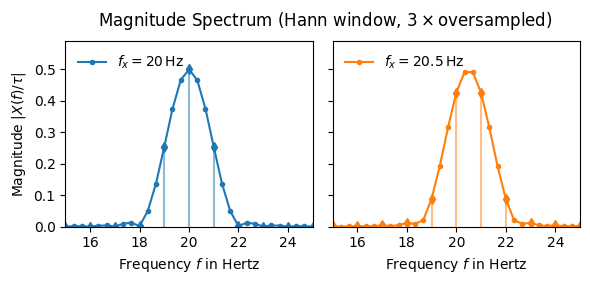

In [12]:
# 사인파 신호에 Hann window를 적용한 후, FFT와 오버샘플링을 통한 FFT의 결과를 보여줌
import matplotlib.pyplot as plt
import numpy as np

from scipy.fft import rfft, rfftfreq
from scipy.signal.windows import hann

n, T = 100, 0.01  # number of samples and sampling interval
tau = n*T # 전체 관측 시간
q = 3  # over-sampling factor
t = np.arange(n) * T
fcc = (20, 20.5)  # frequencies of sines
xx = [np.sin(2 * np.pi * fc_ * t) for fc_ in fcc]  # sine signals
w = hann(n)
c_w = abs(sum(w))  # normalize constant for window

f_X = rfftfreq(n, T)  # frequency bins range from 0 Hz to Nyquist freq.
XX = (rfft(x_ * w) / c_w for x_ in xx)  # one-sided amplitude spectrum
# Oversampled spectrum:
f_Y = rfftfreq(n*q, T)  # frequency bins range from 0 Hz to Nyquist freq.
YY = (rfft(x_ * w, n=q*n) / c_w for x_ in xx)  # one-sided magnitude spectrum

i0, i1 = 15, 25
j0, j1 = i0*q, i1*q

fg1, axx = plt.subplots(1, 2, sharey='all', tight_layout=True,
                        figsize=(6., 3.))
for c_, (ax_, X_, Y_, fx_) in enumerate(zip(axx, XX, YY, fcc)):
    ax_.plot(f_Y[j0:j1 + 1], abs(Y_[j0:j1 + 1]), f'.-C{c_}',
             label=rf"$f_x={fx_}\,$Hz")
    m_ln, s_ln, _, = ax_.stem(f_X[i0:i1 + 1], abs(X_[i0:i1 + 1]), basefmt=' ',
                              markerfmt=f'dC{c_}', linefmt=f'-C{c_}')
    plt.setp(m_ln, markersize=5)
    plt.setp(s_ln, alpha=0.5)

    ax_.legend(loc='upper left', frameon=False)
    ax_.set(xlabel="Frequency $f$ in Hertz", xlim=(f_X[15], f_X[25]),
            ylim=(0, 0.59))

axx[0].set(ylabel=r'Magnitude $|X(f)/\tau|$')
fg1.suptitle(r"Magnitude Spectrum (Hann window, $%d\times$oversampled)" % q,
             x=0.55, y=0.93)
plt.show()
# Hann window는 신호의 끝 부분에서의 급격한 변화를 완화하여 spectral leakage를 줄여줌
# oversampling은 주파수 해상도를 높여서 더 세밀한 주파수 구분을 가능하게 함

# Spectra with Averaging
The periodogram function은 power spectral density (scaling='density') 또는 squared magnitude spectrum (scaling='spectrum')을 calculates합니다. Smoothed periodogram을 obtain하기 위해서는, welch function을 사용할 수 있습니다. 이는 input signal을 overlapping segments로 dividing하여, 각 segment의 windowed DFT를 calculate합니다. The result는 those DFTs의 average입니다.

The example 아래에서는 squared magnitude spectrum과 signal의 power spectral density를 보여줍니다. 이 signal은 [Math Processing Error] sine signal과 amplitude [Math Processing Error], 그리고 mean이 [Math Processing Error]인 additive Gaussian noise로 구성되어 있습니다.
1. Periodogram function: 시계열 데이터의 주파수 분석을 수행하는 데 사용되는 함수로, 특정 시계열 내에서 주기적인 패턴이나 주파수 성분을 식별하는 데 도움을 줍니다. 이 함수는 데이터의 푸리에 변환(Fourier Transform)을 기반으로 하며, 각 주파수에 대해 시계열 데이터의 파워 스펙트럼 밀도(Power Spectral Density, PSD)를 계산합니다. 이를 통해 데이터 내에서 가장 강한 주기성을 가지는 주파수 성분을 확인할 수 있습니다.
    - 시계열 데이터: 시간의 흐름에 따라 순차적으로 기록된 데이터

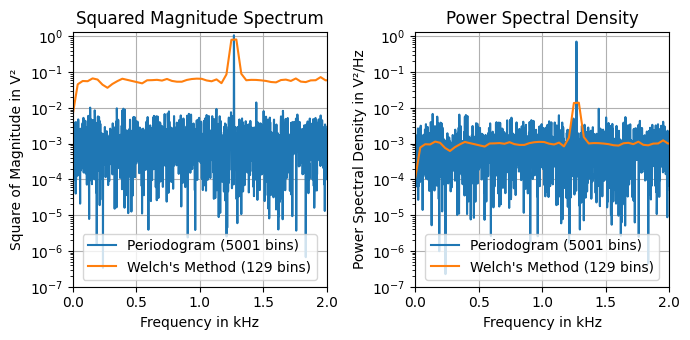

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

rng = np.random.default_rng(73625)  # seeding for reproducibility

fs, n = 10e3, 10_000
f_x, noise_power = 1270, 1e-3 * fs / 2
t = np.arange(n) / fs
x = (np.sqrt(2) * np.sin(2 * np.pi * f_x * t) +
     rng.normal(scale=np.sqrt(noise_power), size=t.shape))

fg, axx = plt.subplots(1, 2, sharex='all', tight_layout=True, figsize=(7, 3.5))
axx[0].set(title="Squared Magnitude Spectrum", ylabel="Square of Magnitude in V²")
axx[1].set(title="Power Spectral Density", ylabel="Power Spectral Density in V²/Hz")
for ax_, s_ in zip(axx, ('spectrum', 'density')):
    f_p, P_p = signal.periodogram(x, fs, 'hann', scaling=s_)
    f_w, P_w = signal.welch(x, fs, scaling=s_)
    ax_.semilogy(f_p/1e3, P_p, label=f"Periodogram ({len(f_p)} bins)")
    ax_.semilogy(f_w/1e3, P_w, label=f"Welch's Method ({len(f_w)} bins)")
    ax_.set(xlabel="Frequency in kHz", xlim=(0, 2), ylim=(1e-7, 1.3))
    ax_.grid(True)
    ax_.legend(loc='lower center')
plt.show()

# Probability distributions
1. rvs: Random Variates
    - 확률 분포에서 무작위로 추출된 값들을 지정함e distribution

In [2]:
from scipy import stats
from scipy.stats import norm
norm.rvs(size=3)

array([ 1.64554714, -1.41494376, -0.68400448])

2. pdf: Probability Density Function
    - 연속 확률 분포에서 변수의 가능한 값에 대한 상대적 확률을 설명하는 함수
    - 모든 가능한 값에 대해 적분하면 1

3. cdf: Cumulative Distribution Function (누적 분포 함수)
    - 확률 변수 X가 특정 값 x보다 작거나 같을 확률 $F(x)=P(X \le x)$
    - 모든 가능한 X값에 대해, $lim_{x->\inf} F(x)=1$

4. sf: Survival Function (1-CDF)
    - 이 함수는 시간 t까지 생존 확률 S(t)로 표현되며, 확률 변수 T가 시간 t 이후에도 아직 '생존' 상태에 있을 확률을 의미
    - $S(t) = P(T>t)$, T는 관심 대상의 생존 시간을 나타내는 확률 변수
    - $S(t)=1-F(t)$

5. ppf: Percent Point Function (Inverse of CDF)
    - 주어진 확률 p에 대해 그 확률을 가지는 가장 작은 x 값을 제공함

6. isf: Inverse Survival Function (Inverse of SF)
    - 주어진 생존 확률에 해당하는 시간을 찾는 데 사용됨
    - $t=S^{-1}(p)$ , 주어진 생존 확률 p, S(t)=p를 만족하는 t값, 즉 t 시간 이상 생존할 확률이 p임을 의미 

7. stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
    - Fisher's Skewness: 데이터의 비대칭성을 측정하는 지표
    - 왜도가 0보다 크면 데이터는 양의 방향으로 치우친 것
    - 왜도가 0보다 작으면 음의 방향으로 치우친 것
    - 왜도가 0이면 완벽하게 대칭인 정규 분포
    - Fisher's Kurtosis: 데이터의 뾰족한 정도를 측정, 데이터가 평균 주위에 얼마나 집중되어 있는지 나타냄
    - 정규 분포의 첨도는 3으로 정의, 피셔의 첨도는 이를 0으로 조정하여 계산함 

8. moment: non-central moments of the distribution

    - non-central moments: 데이터의 원점에 대한 모멘트, 각 데이터 값의 거듭제곱의 기대값으로 정의
    - k번째 비중심 모멘트 $E(X^k)$로 표현됨, X는 확률 변수, E는 기대값
    - Central moments: 데이터의 평균에 대한 모멘트, 데이터 값에서 평균을 뺀 값의 거듭제곱의 기대값으로 정의
    - k번째 중심 모멘트 $E[(X-\mu)^k]$, $\mu$는 평균을 나타냄


# Spatial data structures and algorithms (scipy.spatial)

## Delaunay triangulation
- 주어진 점 집합을 이용하여 삼각형으로 분할하는 기하학적 알고리즘
- 각 삼각형의 내접원에 다른 어떤 점도 포함되지 않는 특성을 가지며, 이 조건은 Delaunay 조건으로 알려짐
- Delaunay 삼각분할의 결과로 나타나는 네트워크는 최대-최소 각 조건을 충족시키는데, 이는 생성된 삼각형의 최소 각이 최대화되도록 함

In [1]:
from scipy.spatial import Delaunay
import numpy as np
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1], [4, 1],[2, 6]])
tri = Delaunay(points)

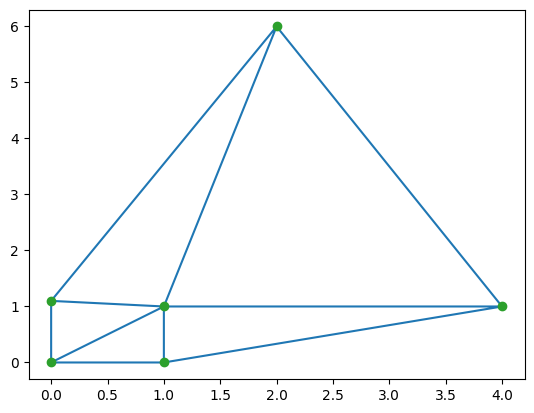

In [2]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')

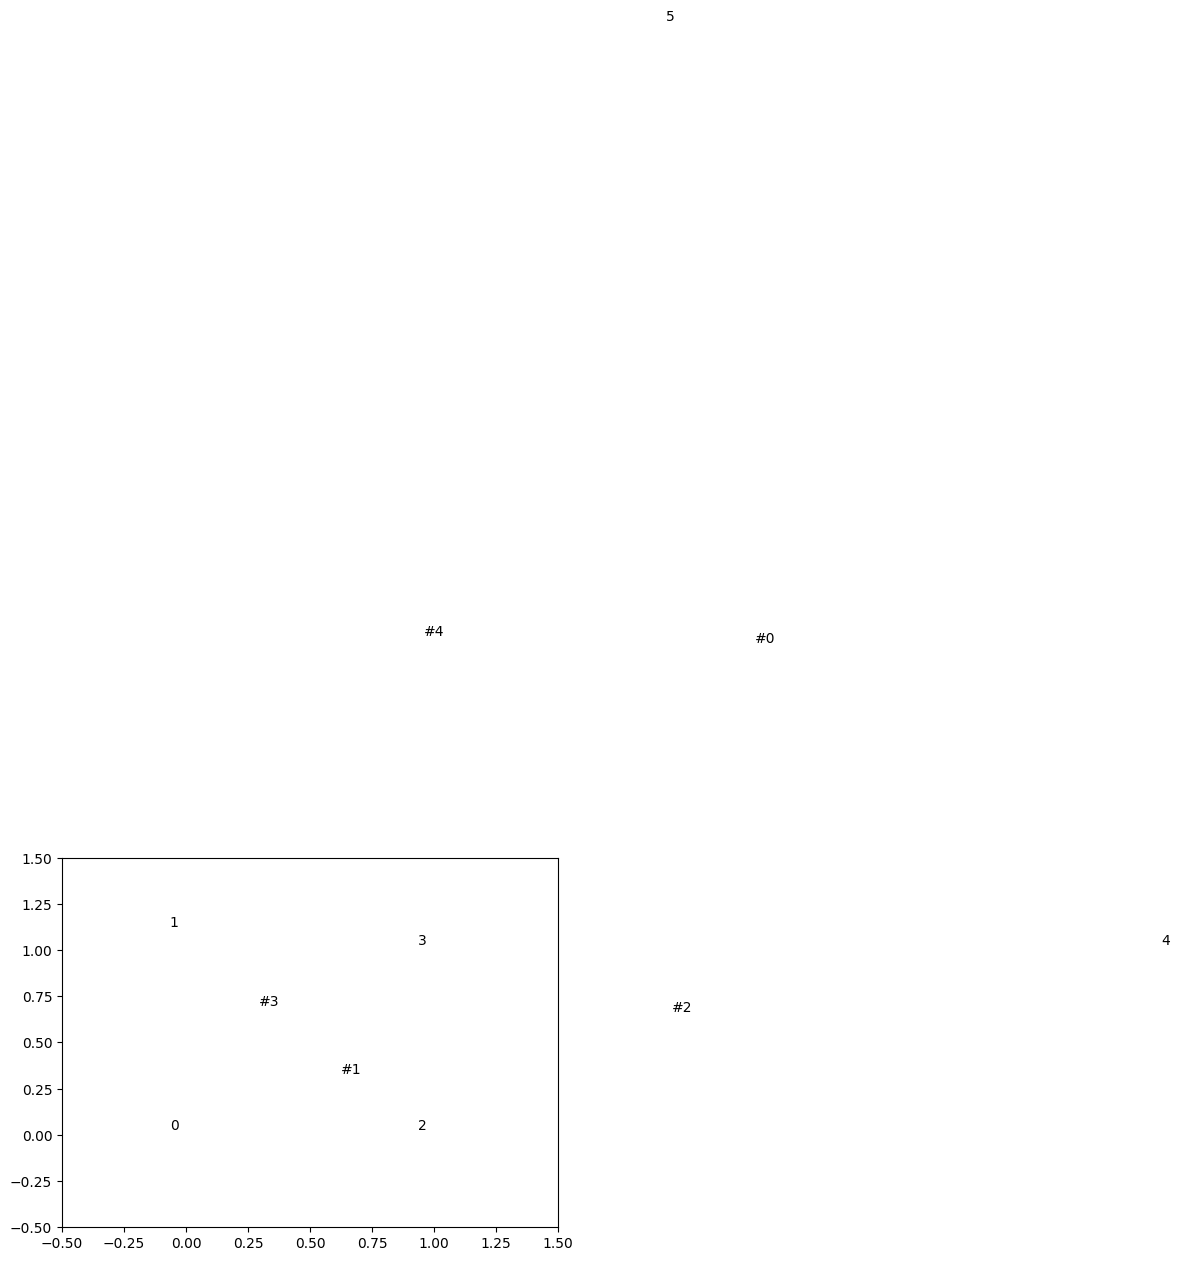

In [3]:
for j, p in enumerate(points):
    plt.text(p[0]-0.03, p[1]+0.03, j, ha='right') # label the points
for j, s in enumerate(tri.simplices):
    p = points[s].mean(axis=0)
    plt.text(p[0], p[1], '#%d' % j, ha='center') # label triangles
plt.xlim(-0.5, 1.5); plt.ylim(-0.5, 1.5)
plt.show()

In [17]:
i = 1
tri.simplices[i,:]
points[tri.simplices[i,:]]

array([[1. , 1. ],
       [0. , 1.1],
       [0. , 0. ]])

In [18]:
tri.neighbors[i]

array([-1,  0, -1], dtype=int32)

In [19]:
points[tri.simplices[i, 1]]

array([0. , 1.1])

## Convex hulls
- 주어진 점 집합을 완전히 포함하는 가장 작은 블록집합을 의미
- 어떤 점들의 집합에 대해 그 점들을 모두 포함하면서 가장 작은 볼록 다각형이나 다면체를 형성하는 것을 말함
- 점들을 연결하는 고무 밴드가 씌워진 것처럼 보임

In [8]:
from scipy.spatial import ConvexHull
rng = np.random.default_rng()
points = rng.random((200, 3))   # 30 random points in 2-D
hull = ConvexHull(points)

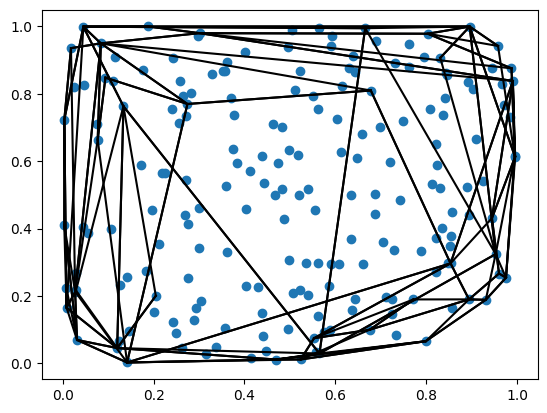

In [9]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex,0], points[simplex,1], 'k-')
plt.show()

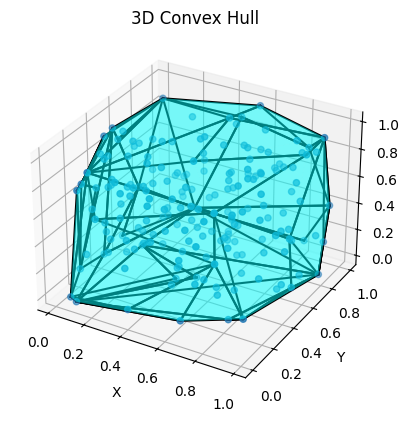

In [10]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 3차원 랜덤 점 생성
rng = np.random.default_rng()
points = rng.random((200, 3))  # 200개의 랜덤 점 생성 (3차원)

# Convex Hull 계산
hull = ConvexHull(points)

# 3차원 플롯 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(points[:, 0], points[:, 1], points[:, 2], 'o')

# Convex Hull 그리기
for simplex in hull.simplices:
    ax.plot(points[simplex, 0], points[simplex, 1], points[simplex, 2], 'k-')

# Convex Hull 면 그리기
vertices = [points[simplex] for simplex in hull.simplices]
hull_poly = Poly3DCollection(vertices, alpha=0.3, facecolor='cyan')
ax.add_collection3d(hull_poly)

# 플롯 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Convex Hull')

# 플롯 보여주기
plt.show()


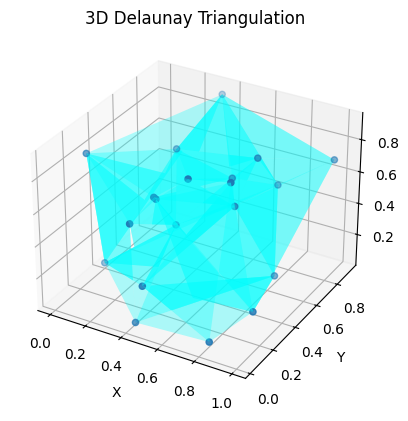

In [12]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 3차원 랜덤 점 생성
rng = np.random.default_rng()
points = rng.random((20, 3))  # 200개의 랜덤 점 생성 (3차원)

# Delaunay 삼각화 계산
tri = Delaunay(points)

# 3차원 플롯 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(points[:, 0], points[:, 1], points[:, 2], 'o')

# Delaunay 삼각화 그리기
for simplex in tri.simplices:
    vertices = points[simplex]
    tri_poly = Poly3DCollection([vertices], alpha=0.3, facecolor='cyan')
    ax.add_collection3d(tri_poly)

# 플롯 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Delaunay Triangulation')

# 플롯 보여주기
plt.show()


## Voronoi diagrams
- 평면 위의 주어진 점들을 기반으로 생성되는, 평면을 여러 영역으로 분할하는 다이어그램


In [33]:
from scipy.spatial import KDTree
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])
tree = KDTree(points)
tree.query([0.1, 0.1])

(0.14142135623730953, 0)

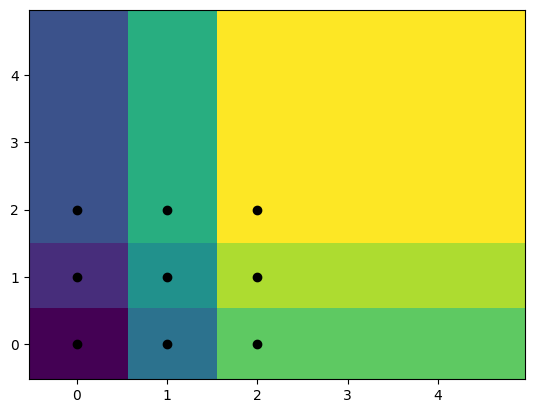

In [47]:
x = np.linspace(-0.5, 5, 51)
y = np.linspace(-0.5, 5, 74)
xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]
import matplotlib.pyplot as plt
dx_half, dy_half = np.diff(x[:3])[0] / 3., np.diff(y[:3])[0] / 3.
x_edges = np.concatenate((x - dx_half, [x[-2] + dx_half]))
y_edges = np.concatenate((y - dy_half, [y[-2] + dy_half]))
plt.pcolormesh(x_edges, y_edges, tree.query(xy)[1].reshape(74, 51), shading='flat')
plt.plot(points[:,0], points[:,1], 'ko')
plt.show()

In [15]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3차원 랜덤 점 생성
rng = np.random.default_rng()
points = rng.random((50, 2))  # 50개의 랜덤 점 생성 (3차원)

# Voronoi 다이어그램 계산
vor = Voronoi(points)

# 3차원 플롯 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(points[:, 0], points[:, 1], 'o')

# Voronoi 다이어그램 그리기
# Voronoi 다이어그램의 3D 플로팅은 scipy에서 직접 제공되지 않으므로
# 2D 플로팅을 사용하여 단면을 보여주는 방법입니다.
# 이 예에서는 z=0 평면의 Voronoi 다이어그램을 2D로 그립니다.
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='k', line_width=1, line_alpha=0.6, point_size=2)

# 플롯 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Voronoi Diagram (2D slice)')

# 플롯 보여주기
plt.show()


ValueError: could not convert string to float: 'o'

Error in callback <function _draw_all_if_interactive at 0x000001B35A0592D0> (for post_execute), with arguments args (),kwargs {}:


ValueError: data type must provide an itemsize

ValueError: data type must provide an itemsize

<Figure size 640x480 with 1 Axes>

In [41]:
print(xy)

[[-0.5  -0.5 ]
 [-0.44 -0.5 ]
 [-0.38 -0.5 ]
 ...
 [ 2.38  2.5 ]
 [ 2.44  2.5 ]
 [ 2.5   2.5 ]]


In [22]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

In [23]:
def mandala(n_iter, n_points, radius):
    """Creates a mandala figure using Voronoi tessellations.
    Parameters
    ----------
    n_iter : int
        Number of iterations, i.e. how many times the equidistant points will
        be generated.
    n_points : int
        Number of points to draw per iteration.
    radius : scalar
        The radial expansion factor.
    Returns
    -------
    fig : matplotlib.Figure instance
    Notes
    -----
    This code is adapted from the work of Audrey Roy Greenfeld [1]_ and Carlos
    Focil-Espinosa [2]_, who created beautiful mandalas with Python code.  That
    code in turn was based on Antonio Sánchez Chinchón's R code [3]_.
    References
    ----------
    .. [1] https://www.codemakesmehappy.com/2019/09/voronoi-mandalas.html
    .. [2] https://github.com/CarlosFocil/mandalapy
    .. [3] https://github.com/aschinchon/mandalas
    """
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.set_axis_off()
    ax.set_aspect('equal', adjustable='box')
    angles = np.linspace(0, 2*np.pi * (1 - 1/n_points), num=n_points) + np.pi/2
    # Starting from a single center point, add points iteratively
    xy = np.array([[0, 0]])
    for k in range(n_iter):
        t1 = np.array([])
        t2 = np.array([])
        # Add `n_points` new points around each existing point in this iteration
        for i in range(xy.shape[0]):
            t1 = np.append(t1, xy[i, 0] + radius**k * np.cos(angles))
            t2 = np.append(t2, xy[i, 1] + radius**k * np.sin(angles))
        xy = np.column_stack((t1, t2))
    # Create the Mandala figure via a Voronoi plot
    spatial.voronoi_plot_2d(spatial.Voronoi(xy), ax=ax)
    return fig

In [26]:
# Modify the following parameters in order to get different figures
n_iter = 5
n_points = 8
radius = 3

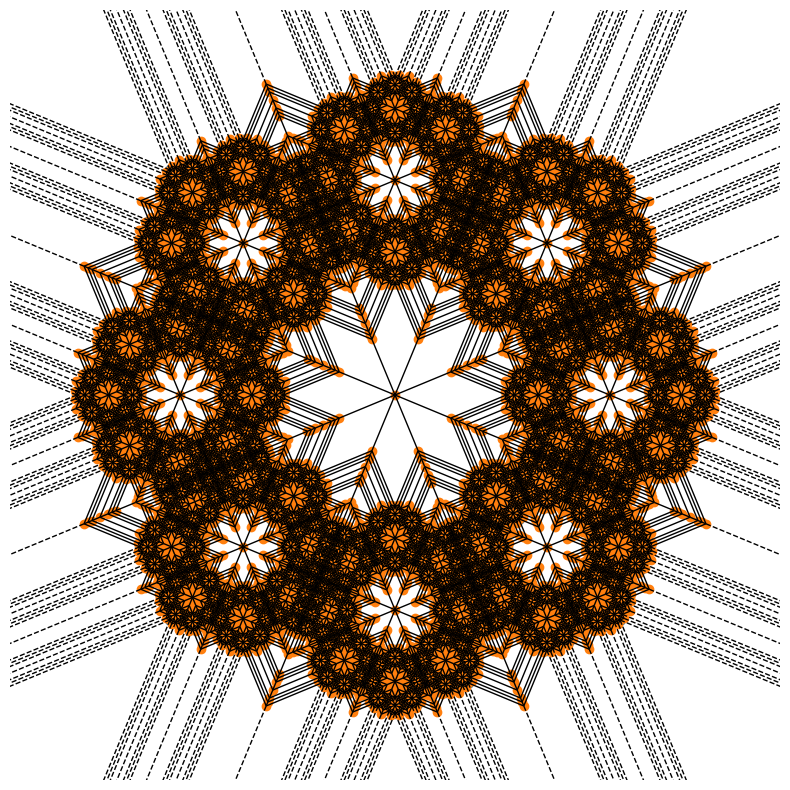

In [27]:
fig = mandala(n_iter, n_points, radius)
plt.show()